In [2]:
# Import needed
%matplotlib inline
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import copy
from scipy.cluster.vq import kmeans2
from scipy.spatial import distance

# Lecture et affichage d'une image

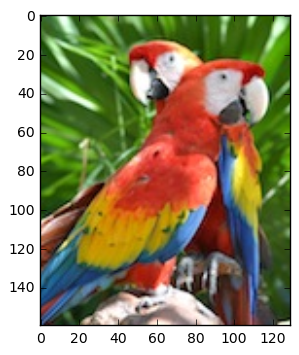

In [4]:
img = mpimg.imread('ara.png')
plt.imshow(img)

# Copie de l'image

In [5]:
imgcpy = copy.deepcopy(img)
np.shape(imgcpy)

(160, 129, 3)

# Redimensionnement de l'image

In [6]:
couleurs = np.reshape(imgcpy,(160*129,3))
np.shape(couleurs)

(20640, 3)

In [13]:
print(imgcpy[0][0])
print(couleurs[0])
imgcpy[0][0] = [1,1,1]
print(imgcpy[0][0])
print(couleurs[0])

[ 0.26274511  0.44313726  0.2       ]
[ 0.26274511  0.44313726  0.2       ]
[ 1.  1.  1.]
[ 1.  1.  1.]


# Utilisation du kmean de scipy

[[ 0.40597355  0.48998731  0.47973815]
 [ 0.76798803  0.35963532  0.15257047]
 [ 0.3520779   0.53373605  0.13599566]
 [ 0.21834072  0.28099272  0.11002351]
 [ 0.84116411  0.81869268  0.74436516]]
[2 2 2 ..., 4 4 4]


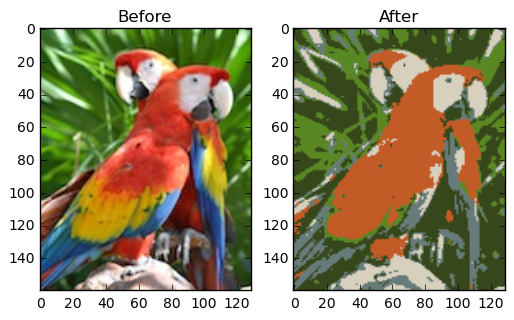

In [14]:
imgcpy = copy.deepcopy(img)
couleurs = np.reshape(imgcpy,(160*129,3))
[centroids, labels] = kmeans2(couleurs,5)
print(centroids)
print(labels)

# -------------------- Affichage pour vérification du kmean --------------------
for i in range(len(couleurs)):
    couleurs[i] = centroids[labels[i]]

fig = plt.figure()
a = fig.add_subplot(1,2,1)
a.set_title('Before')
plt.imshow(img)
a=fig.add_subplot(1,2,2)
a.set_title('After')
plt.imshow(imgcpy)

# Programmation de notre propre kmean

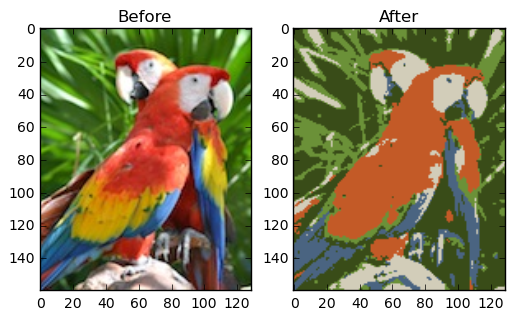

In [15]:
# -------------------- Initialisation --------------------
k = 5
imgcpy = copy.deepcopy(img)
couleurs = np.reshape(imgcpy,(160*129,3))
centroids = np.array([[0.,0.,0.],[0.,0.,1.],[0.,1.,0.],[1.,0.,0.],[1.,1.,1.]])


# -------------------- Repeter l'algorithme jusqu'a convergence --------------------
cpt=3
while cpt>0:
    labels = []
    # Assigner chaque points au centroide le plus proche
    for i in range(len(couleurs)):
        distances = []
        for j in range(k):
            distances.append(distance.euclidean(couleurs[i],centroids[j]))
        labels.append(distances.index(min(distances)))
    # Nouveau centroide = moyenne de tout les points assigner à ce cluster précédemment
    for i in range(len(centroids)):
        x, y, z = 0., 0., 0.
        nb = 0
        for j in range(len(labels)):
            if labels[j]==i:
                x += couleurs[j][0]
                y += couleurs[j][1]
                z += couleurs[j][2]
                nb += 1
        centroids[i] = [x/nb,y/nb,z/nb]
    cpt -= 1


# -------------------- Affichage pour vérification du kmean --------------------
for i in range(len(couleurs)):
    couleurs[i] = centroids[labels[i]]

fig = plt.figure()
a = fig.add_subplot(1,2,1)
a.set_title('Before')
plt.imshow(img)
a=fig.add_subplot(1,2,2)
a.set_title('After')
plt.imshow(imgcpy)